# Sample n fics from 7 fandoms

In [ ]:
import os
import pandas as pd
from IPython.core.debugger import set_trace

# Settings
n_fics = 3000

# Load metadata

fandoms = [
    'allmarvel',
    'supernatural',
    'harrypotter',
    'dcu',
    'sherlock',
    'teenwolf',
    'starwars',
]

metadata = {}

for fandom in fandoms:
    metadata_path = f'/usr2/scratch/fanfic/ao3_{fandom}_text/stories.csv'
    metadata[fandom] = pd.read_csv(metadata_path)
   

In [27]:
# Filter fics
from tqdm import tqdm_notebook as tqdm

if not fic_ids or not isinstance(fic_ids, dict):
    fic_ids = {}
fic_ids[f'seven_fandoms_random{n_fics}'] = {fandom: [] for fandom in fandoms}

for fandom in tqdm(fandoms):
    print(fandom)
        
    # Filter out long fics >100k words
    selected = metadata[fandom].loc[metadata[fandom]['words'] <= 100000]
    selected = selected.sample(n_fics)['fic_id'].tolist()
    fic_ids[f'seven_fandoms_random{n_fics}'][fandom].extend(selected) 
        
    # Save out filenames
    with open(f'/usr2/mamille2/fanfiction-project/data/ao3/{fandom}/random{n_fics}_filenames.txt', 'w') as f:
        for fic_id in fic_ids[f'seven_fandoms_random{n_fics}'][fandom]:
            f.write(f'{fic_id}.txt\n')

allmarvel
supernatural
harrypotter
dcu
sherlock
teenwolf
starwars


# Check term frequencies, fics with more occurrences in each corpus

In [29]:
from IPython.core.debugger import set_trace

# Term frequencies in each corpus
import re

paths = [ # currently not used
#     '/usr2/mamille2/fanfiction-project/data/ao3/seven_fandoms_random1000.txt',
    '/usr2/mamille2/fanfiction-project/data/ao3/seven_fandoms_random3000.txt',
    '/usr2/mamille2/coca/fiction_paras.txt',
    '/usr0/home/mamille2/new_home/fanfiction/data/challenges_seven_fandoms.txt',
    '/usr0/home/mamille2/new_home/fanfiction/data/aspirational_seven_fandoms.txt',
]

marked_labels = ['transgender', 'trans', 'queer', 'lesbian', 'gay', 'homosexual']
unmarked_labels = ['heterosexual', 'cisgender', 'cis']
labels = marked_labels + unmarked_labels
label_patterns = [r'\b' + term + r'\b' for term in marked_labels + unmarked_labels]

term_counts = {}

# aspirational, challenges corpora
# for corpus in tag_corpora:
# for corpus in ['challenges']:
#     term_counts[corpus] = {}
#     for fandom in tqdm(fandoms):
# #     for fandom in ['allmarvel']:
#         term_counts[corpus][fandom] = {}
#         for fic_id in fic_ids[corpus][fandom]:
#             term_counts[corpus][fandom][fic_id] = {}
#             path = f'/usr2/mamille2/fanfiction-project/data/ao3/{fandom}/fics_paras/{fic_id}.txt'
                
#             with open(path, 'r') as f:
#                 text = f.read().lower()
#                 for label, pattern in zip(labels, label_patterns):
# #                     term_count = text.count(term)
#                     result = re.findall(pattern, text)
#                     term_count = len(result)
#                     term_counts[corpus][fandom][fic_id][label] = term_count
            
# seven fandoms random 1000
# corpus = 'seven_fandoms_random1000'
corpus = 'seven_fandoms_random3000'
term_counts[corpus] = {}
for fandom in tqdm(fandoms):
    term_counts[corpus][fandom] = {}
    
    # Load fic ids
    with open(f'/usr2/mamille2/fanfiction-project/data/ao3/{fandom}/random3000_filenames.txt') as f:
        fic_ids_corpus = [el[:-4] for el in f.read().splitlines()]
        
    for fic_id in fic_ids_corpus:
        term_counts[corpus][fandom][fic_id] = {}
        path = f'/usr2/mamille2/fanfiction-project/data/ao3/{fandom}/fics_paras/{fic_id}.txt'

        with open(path, 'r') as f:
            text = f.read().lower()
            for label, pattern in zip(labels, label_patterns):
#                     term_count = text.count(term)
                result = re.findall(pattern, text)
                term_count = len(result)
                term_counts[corpus][fandom][fic_id][label] = term_count
                
# print(len(term_counts))

for corpus in term_counts:
    for fandom in fandoms:
        for fic_id in term_counts[corpus][fandom]:
            for label in labels:
                rows.append([corpus, fandom, fic_id, label, 
                            term_counts[corpus][fandom][fic_id][label]])
                
term_counts_df = pd.DataFrame(rows, columns=['corpus', 'fandom', 
                                            'fic_id', 'label', 'count'])
term_counts_df = term_counts_df[term_counts_df['count']>0]
len(term_counts_df)
term_counts_df.sort_values(['corpus', 'label', 'count'], ascending=False, inplace=True)
# term_counts_df

# Count terms for each corpus
corpus_label_totals = term_counts_df.groupby(['corpus', 'label']).agg({'count': sum})
corpus_label_totals

count
corpus                   label              
aspirational             cis             633
                         cisgender       129
                         gay           39012
                         heterosexual    804
                         homosexual     1413
                         lesbian        2934
                         queer          5019
                         trans          5130
                         transgender    2106
challenges               cis             477
                         cisgender       126
                         gay           44676
                         heterosexual   1179
                         homosexual     3264
                         lesbian        2310
                         queer          7884
                         trans          2541
                         transgender    1602
seven_fandoms_random1000 cis              15
                         gay            1547
                         heterosexual     36
                         homosexual       59
                         lesbian          95
                         queer           119
                         trans            37
                         transgender      17
seven_fandoms_random3000 cis              56
                         cisgender         1
                         gay            3803
                         heterosexual    161
                         homosexual      218
                         lesbian         288
                         queer           352
                         trans           121
                         transgender      49

In [30]:
# Get top 50 fics for every label in every corpus

top_fics = term_counts_df.groupby(['corpus', 'label']).head(50).reset_index(drop=True)
pd.set_option('display.max_rows', 1000)
print(len(top_fics))
top_fics

1522


,corpus,fandom,fic_id,label,count
0,seven_fandoms_random3000,allmarvel,4956793,transgender,8
1,seven_fandoms_random3000,sherlock,1153158,transgender,5
2,seven_fandoms_random3000,allmarvel,12178605,transgender,3
3,seven_fandoms_random3000,harrypotter,9784613,transgender,3
4,seven_fandoms_random3000,sherlock,16567010,transgender,3
5,seven_fandoms_random3000,allmarvel,13617405,transgender,2
6,seven_fandoms_random3000,allmarvel,4613406,transgender,2
7,seven_fandoms_random3000,dcu,3903370,transgender,2
8,seven_fandoms_random3000,teenwolf,1171302,transgender,2
9,seven_fandoms_random3000,allmarvel,14521506,transgender,1


In [31]:
top_fics['corpus'].unique()

array(['seven_fandoms_random3000', 'seven_fandoms_random1000',
       'challenges', 'aspirational'], dtype=object)

In [32]:
top_fics = top_fics[top_fics['corpus'] != 'seven_fandoms_random1000']
top_fics['corpus'].unique()

array(['seven_fandoms_random3000', 'challenges', 'aspirational'],
      dtype=object)

In [33]:
term_counts_df.to_csv('/usr0/home/mamille2/new_home/fanfiction/output/label_counts.csv', index=False)

In [34]:
top_fics.to_csv('/usr0/home/mamille2/new_home/fanfiction/output/label_counts_top50.csv', index=False)

In [18]:
# Get top 50 fics for every label in every corpus

top_fics = term_counts_df.groupby(['corpus', 'label']).head(50).reset_index(drop=True)
pd.set_option('display.max_rows', 1000)
print(len(top_fics))
top_fics

1169


,corpus,fandom,fic_id,label,count
0,seven_fandoms_random1000,harrypotter,12122820,transgender,6
1,seven_fandoms_random1000,harrypotter,13943835,transgender,4
2,seven_fandoms_random1000,allmarvel,1748693,transgender,1
3,seven_fandoms_random1000,supernatural,11917878,transgender,1
4,seven_fandoms_random1000,supernatural,401821,transgender,1
5,seven_fandoms_random1000,harrypotter,8209240,transgender,1
6,seven_fandoms_random1000,sherlock,5853391,transgender,1
7,seven_fandoms_random1000,teenwolf,886272,transgender,1
8,seven_fandoms_random1000,teenwolf,12782550,transgender,1
9,seven_fandoms_random1000,harrypotter,12122820,trans,11


# Create aspirational and real-world corpora

In [3]:
import os
import pandas as pd

# Load metadata

fandoms = [
    'allmarvel',
    'supernatural',
    'harrypotter',
    'dcu',
    'sherlock',
    'teenwolf',
    'starwars',
]

metadata = {}

for fandom in fandoms:
    metadata_path = f'/usr2/scratch/fanfic/ao3_{fandom}_text/stories.csv'
    metadata[fandom] = pd.read_csv(metadata_path)

# Tag separation

tag_corpora = {}
tag_corpora['aspirational'] = [
    "lgbtq themes",
    "coming out",
    "gay",
    "trans character",
    "gay character",
    "bi character",
    "lesbian character",
]

tag_corpora['challenges'] = [
    "homophobia",
    "slurs",
    "transphobia",
    "biphobia",
    "closeted character",
    "internalized homophobia", 
    "homophobic language", 
    "outing", 
    "hate crimes",
]

# Filter to fics that have each
from tqdm import tqdm_notebook as tqdm

fic_ids = {corpus: {fandom: [] for fandom in fandoms} for corpus in tag_corpora}
total_fics = 0

for fandom in tqdm(fandoms):
    print(fandom)
    for corpus, tag_list in list(tag_corpora.items()):
        
        # Filter out long fics >100k words
        selected = metadata[fandom].loc[metadata[fandom]['words'] <= 100000]
        selected = selected.loc[
#             [metadata[fandom]['additional tags'].map(lambda x: any([t in eval(x.lower()) for t in tag_list]))],
#             'fic_id'].tolist()
            selected['additional tags'].map(lambda x: any([t in eval(x.lower()) for t in tag_list])),
            'fic_id'].tolist()
        fic_ids[corpus][fandom].extend(selected) 
        
    total_fics += len(metadata[fandom])
    
for corpus in tag_corpora:
    print(f'{corpus}: {sum(len(fic_ids[corpus][f]) for f in fandoms)}')
print(f'Total fics: {total_fics}')

allmarvel
supernatural
harrypotter
dcu
sherlock
teenwolf
starwars

aspirational: 7174
challenges: 6089
Total fics: 1036031


In [6]:
# Save out
import pickle


with open('/usr0/home/mamille2/new_home/fanfiction/data/corpus_fic_ids.txt', 'wb') as f:
    pickle.dump(total_fics,    f)

## Concatenate text files

In [2]:
outpath = '/usr0/home/mamille2/new_home/fanfiction/data/{}_seven_fandoms.txt'

for corpus in tag_corpora:
# for corpus in ['aspirational']:
    
    with open(outpath.format(corpus), 'w') as outfile:
    
        for fandom in tqdm(fandoms):
            
            inpath = '/usr2/mamille2/fanfiction-project/data/ao3/{0}/fics_paras/{1}.txt'
                
            for fic_id in tqdm(fic_ids[corpus][fandom]):

                # Load file, write file
                with open(inpath.format(fandom, fic_id), 'r') as f:
                    file = f.read()
                outfile.write(f"{file}\n")

## Investigate word length in fics 

In [8]:
# Challenges dist in word length

challenges_fic_ids = [fic_id for fandom_fic_ids in fic_ids['challenges'].values() for fic_id in fandom_fic_ids]
print(len(challenges_fic_ids))

6351

In [9]:
# Get fic word counts
challenges_word_counts = []
for fandom in fandoms:
    word_counts = metadata[fandom].loc[metadata[fandom]['fic_id'].isin(challenges_fic_ids), 'words'].tolist()
    challenges_word_counts.extend(word_counts)
    
print(len(challenges_word_counts))
# print(challenges_word_counts[:30])

6351
[1075.0, 426.0, 1438.0, 19897.0, 27485.0, 1138.0, 31205.0, 4020.0, 3361.0, 115622.0, 1255.0, 376928.0, 8019.0, 1903.0, 21215.0, 3219.0, 681.0, 4176.0, 99.0, 22774.0, 43645.0, 38181.0, 6069.0, 3714.0, 9015.0, 8755.0, 1831.0, 11288.0, 544.0, 5185.0]


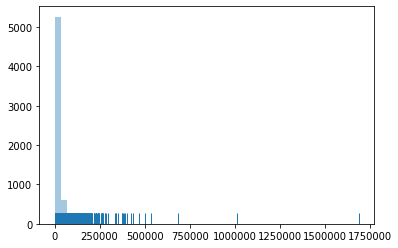

In [11]:
# Plot word counts
import seaborn as sns

sns.distplot(challenges_word_counts, kde=False, rug=True)

7299


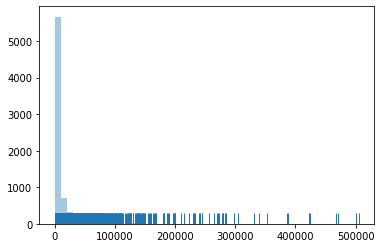

In [14]:
# Aspirational dist in word length
import numpy as np

aspirational_fic_ids = [fic_id for fandom_fic_ids in fic_ids['aspirational'].values() for fic_id in fandom_fic_ids]
#print(len(aspirational_fic_ids))

# Get fic word counts
aspirational_word_counts = []
for fandom in fandoms:
    word_counts = [x for x in metadata[fandom].loc[metadata[fandom]['fic_id'].isin(aspirational_fic_ids), 'words'].tolist() if not np.isnan(x)]
    aspirational_word_counts.extend(word_counts)
    
print(len(aspirational_word_counts))
# print(aspirational_word_counts[:30])

# Plot word counts
import seaborn as sns

sns.distplot(aspirational_word_counts, kde=False, rug=True)

# Check how many fics have only slash pairings with/without identity terms

In [1]:
import os
import pandas as pd

# Load metadata

fandoms = [
    'allmarvel',
    'supernatural',
    'harrypotter',
    'dcu',
    'sherlock',
    'teenwolf',
    'starwars',
]

metadata = {}

for fandom in fandoms:
    metadata_path = f'/usr2/scratch/fanfic/ao3_{fandom}_text/stories.csv'
    metadata[fandom] = pd.read_csv(metadata_path)

In [4]:
metadata['allmarvel']['category'].sample(100)

223501                  []
137093             ["M/M"]
138686           ["Multi"]
4178               ["M/M"]
173208      ["F/M", "Gen"]
233452             ["M/M"]
88342              ["M/M"]
13236              ["F/M"]
114411             ["M/M"]
178779             ["M/M"]
9978                    []
243303    ["F/F", "Multi"]
91401                   []
8969               ["F/M"]
149064    ["M/M", "Multi"]
35493       ["Gen", "F/M"]
20988              ["F/M"]
133452           ["Multi"]
212984             ["M/M"]
88045              ["M/M"]
220966             ["F/M"]
226489      ["M/M", "F/M"]
158693             ["M/M"]
119900             ["F/M"]
120006                  []
165325             ["F/F"]
168175             ["M/M"]
172387             ["Gen"]
122069             ["F/M"]
79345              ["F/M"]
                ...       
59395              ["F/M"]
223752      ["F/M", "Gen"]
64540              ["F/M"]
54522              ["M/M"]
234442             ["M/M"]
21681              ["F/F"]
2

In [9]:
for fandom in fandoms:
    
    metadata[fandom]['only_slash'] = metadata[fandom]['category'].map(
        lambda x: all(cat in ['F/F', 'M/M'] for cat in eval(x)))

In [11]:
lines = []

for fandom in fandoms:
    n_only_slash = sum(metadata[fandom]['only_slash'])
    lines.append([fandom, n_only_slash, len(metadata[fandom])-n_only_slash])
    
pd.DataFrame(lines, columns=['fandom', 'num_only_slash', 'num_other'])

,fandom,num_only_slash,num_other
0,allmarvel,115231,129969
1,supernatural,112443,77252
2,harrypotter,86690,92717
3,dcu,62764,60837
4,sherlock,68312,49288
5,teenwolf,63743,34576
6,starwars,31272,50937


In [ ]:
# Check for LGBTQ identity terms in those fics
import re

marked_labels = ['transgender', 'trans', 'queer', 'lesbian', 'gay', 'homosexual']
unmarked_labels = ['heterosexual', 'cisgender', 'cis']

